# Import libraries

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Load Dataset and Analyze

In [45]:
# load the dataset and display the first five rows
df = pd.read_csv("student_data_train.csv")

In [46]:
# Display summary statistics of the training dataset
print("Summary Statistics of Training Data")
print(df.describe())

Summary Statistics of Training Data
       Attendance (%)  Assignment Completion (%)  Test Score (25%)  \
count     5000.000000                5000.000000       5000.000000   
mean         4.490500                   8.122580         12.380420   
std          3.630328                   6.431008          9.248397   
min          0.000000                   0.000000          0.000000   
25%          1.800000                   2.900000          4.200000   
50%          3.500000                   6.300000         10.400000   
75%          6.125000                  12.500000         19.300000   
max         15.000000                  25.000000         34.900000   

       Practical Score (25%)  Exam Score (50%)          Age  \
count            5000.000000       5000.000000  5000.000000   
mean               10.879500         14.108920    21.573600   
std                 7.143539         12.888471     2.289199   
min                 0.000000          0.000000    18.000000   
25%               

In [47]:
# Check for missing values in the training dataset
print("Checking for missing valuse in Training Data")
df.isnull().sum()

Checking for missing valuse in Training Data


Attendance (%)                             0
Assignment Completion (%)                  0
Test Score (25%)                           0
Practical Score (25%)                      0
Exam Score (50%)                           0
Total Grade                                0
Age                                        0
Gender                                     0
Marital Status                             0
Children (if Married)                      0
Mother Education                           0
Father Education                           0
Guardian (Sponsor)                         0
Extracurricular Activities                 0
Online Time (Daily)                        0
Family Relationship                        0
Free Time Activities                       0
Alcoholic Consumption                      0
Religious Programs (Weekly)                0
Computer/Laptop Access (for Practicals)    0
dtype: int64

# Data Preprocessing

In [48]:
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [49]:
# split the data into features and target variable
X = df.drop('Performance', axis=1)
y = df['Performance']

In [50]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df

,Attendance (%),Assignment Completion (%),Test Score (25%),Practical Score (25%),Exam Score (50%),Total Grade,Age,Gender,Marital Status,Children (if Married),Mother Education,Father Education,Guardian (Sponsor),Extracurricular Activities,Online Time (Daily),Family Relationship,Free Time Activities,Alcoholic Consumption,Religious Programs (Weekly),Computer/Laptop Access (for Practicals)
0,3.3,5.5,7.8,3.3,2.2,0,18,0,2,0,2,2,0,1,7,0,0,2,1,1
1,8.9,14.9,20.8,8.9,6.0,0,19,0,1,2,4,1,3,1,8,0,1,2,4,1
2,14.0,23.4,32.8,14.0,9.4,0,22,0,2,0,0,2,4,1,4,2,1,1,4,1
3,8.6,14.3,20.1,8.6,5.7,0,21,1,2,0,1,0,5,1,6,1,1,2,0,1
4,4.8,8.0,11.2,4.8,3.2,0,22,1,0,0,2,0,4,1,6,0,1,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.3,2.3,2.3,9.4,30.5,5,23,1,2,0,1,0,0,0,0,0,2,0,3,0
4996,3.7,3.7,3.7,14.9,48.5,5,22,0,2,0,0,4,0,0,0,2,2,0,7,0
4997,4.2,4.2,4.2,17.0,55.2,5,25,1,1,0,4,3,4,0,0,1,2,0,1,0
4998,4.8,4.8,4.8,19.1,62.0,5,23,0,2,0,1,0,3,0,0,1,2,0,7,0


# Model Creation and Training

In [51]:
# Create the decision tree classifier
clf = DecisionTreeClassifier()

In [52]:
# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Model Prediction

In [53]:
# Make prediction on the test data
y_pred = clf.predict(X_test)

# Model Evaluation

In [54]:
# Calculate and print metrics 
print("Accuracy::", metrics.accuracy_score(y_test, y_pred))
print("Precision::", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall::", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1-Score::", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy:: 0.989
Precision:: 0.989078622915848
Recall:: 0.989
F1-Score:: 0.9890031458833357


In [55]:
# View classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       321
           1       0.99      0.99      0.99       179
           2       0.99      0.97      0.98       152
           3       0.97      0.99      0.98       156
           4       0.98      0.99      0.98        81
           5       0.99      0.98      0.99       111

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [56]:
# Save the trained model to a file
joblib.dump(clf, 'student_performance_predictor.joblib')

print("Model saved successfully.")

Model saved successfully.


# Calculate Feature Importance

In [57]:
importances = clf.feature_importances_
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature' : X.columns, 'Importance' : importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

                                    Feature  Importance
4                          Exam Score (50%)    0.257401
12               Extracurricular Activities    0.240445
16                    Alcoholic Consumption    0.149754
1                 Assignment Completion (%)    0.098049
0                            Attendance (%)    0.096239
3                     Practical Score (25%)    0.079972
2                          Test Score (25%)    0.067016
5                                       Age    0.002711
7                            Marital Status    0.002670
17              Religious Programs (Weekly)    0.001307
8                     Children (if Married)    0.001172
15                     Free Time Activities    0.000827
14                      Family Relationship    0.000808
10                         Father Education    0.000691
13                      Online Time (Daily)    0.000496
9                          Mother Education    0.000281
11                       Guardian (Sponsor)    0

# Visualizations

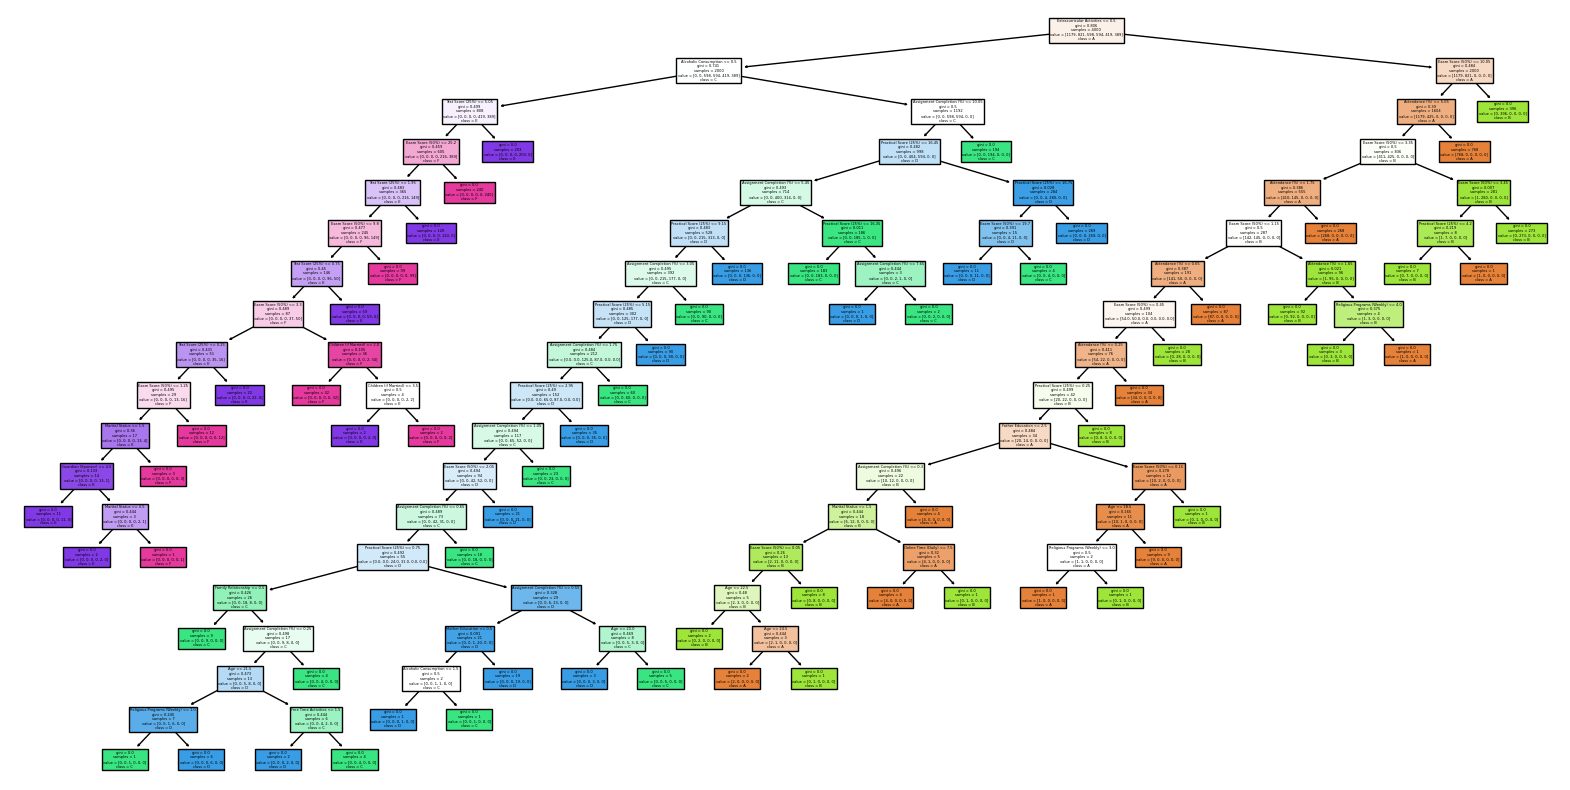

In [58]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['Performance'].classes_)
plt.show()

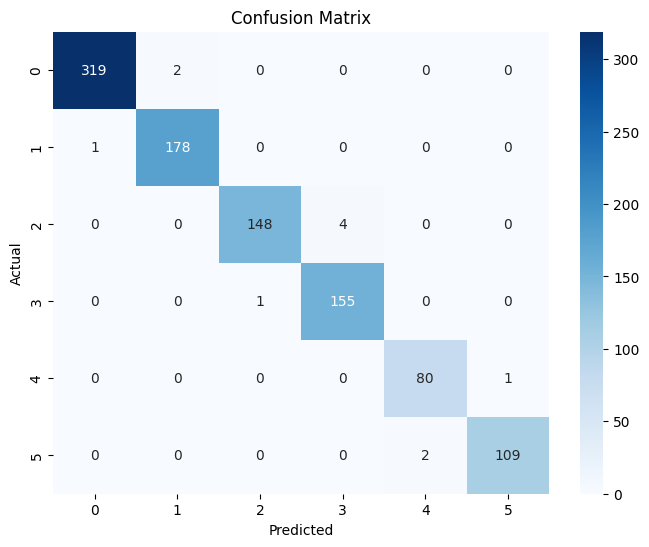

In [59]:
# Plot confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', dpi=300)
plt.show() 

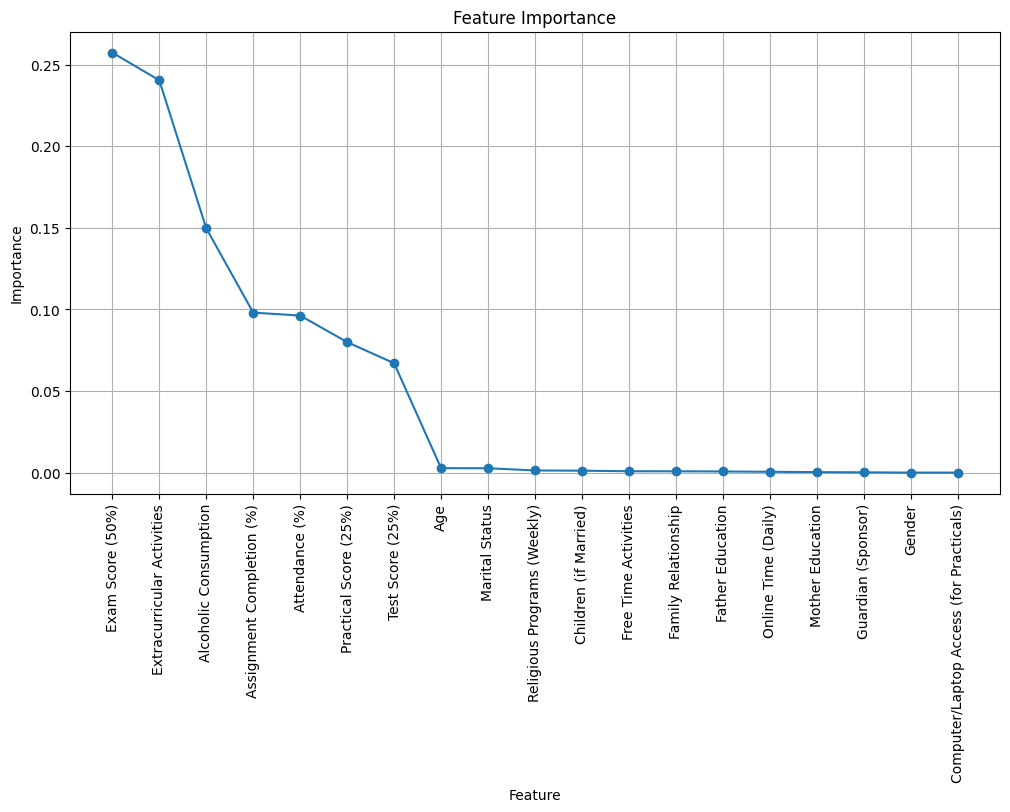

In [60]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.plot(feature_importances['Feature'], feature_importances['Importance'], marker='o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.savefig('feature_importance.jpg', dpi=300)
plt.show()

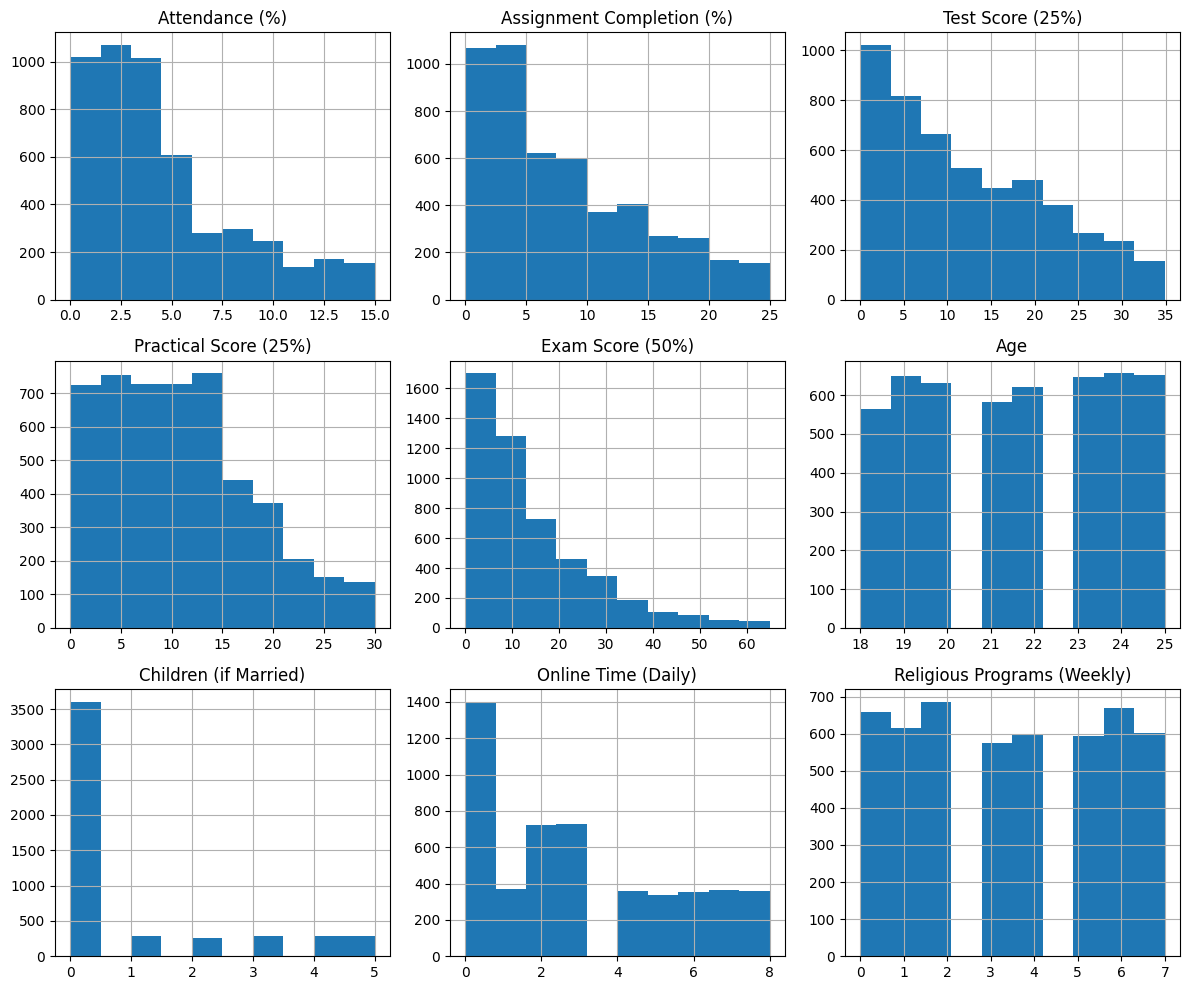

In [61]:
# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('feature_visualizations.jpg', dpi=300)
plt.show()

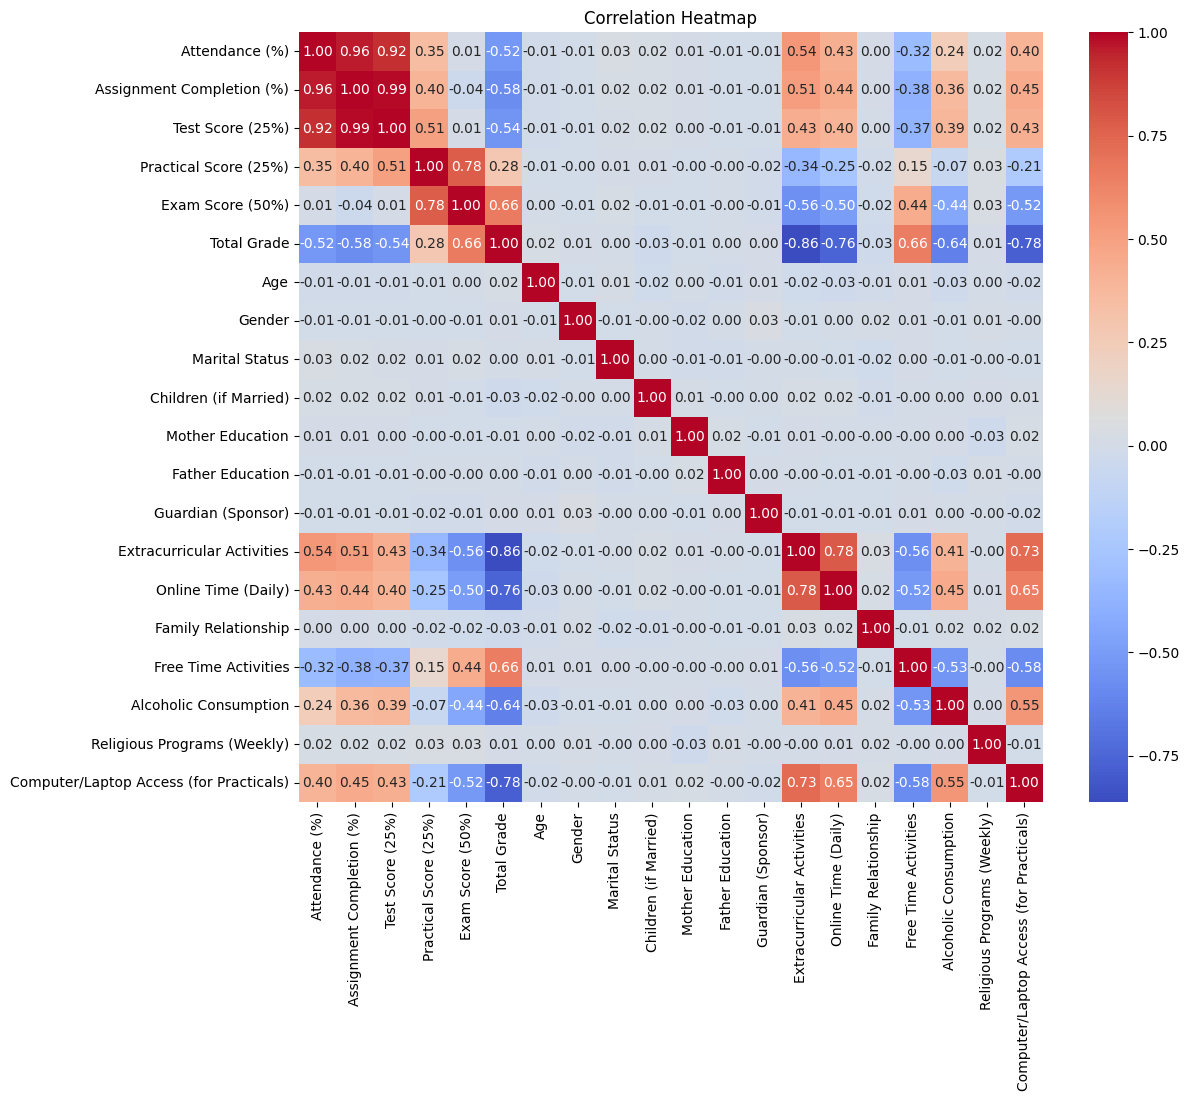

In [62]:
# Plot correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg', dpi=300)
plt.show()

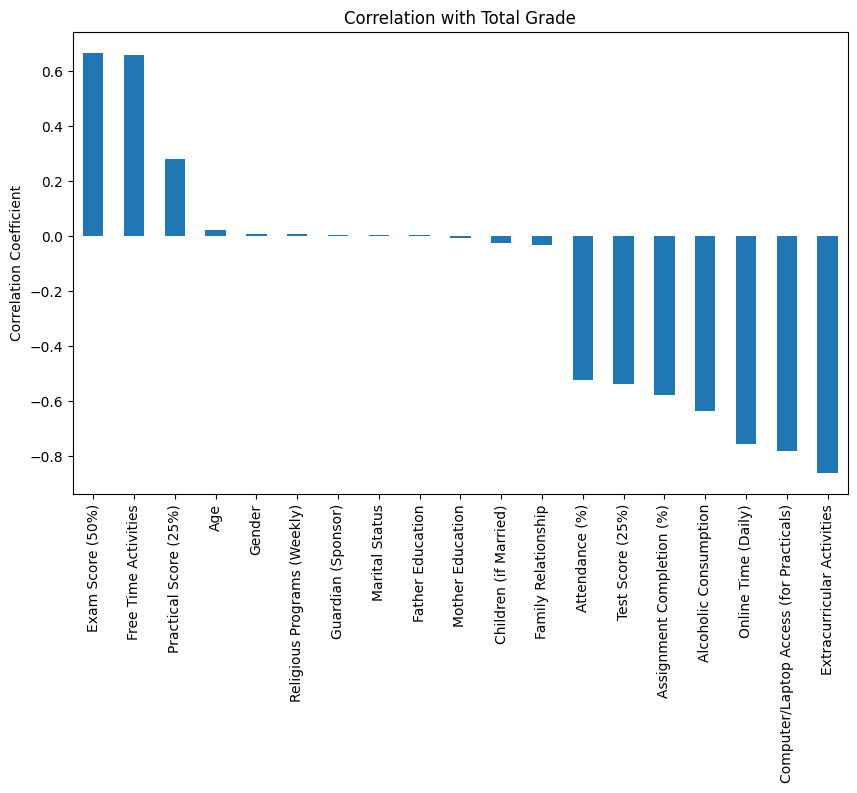

In [63]:
# Find correlations with Performance
correlations = df.corr()['Performance'].drop('Performance')
correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Performance')
plt.ylabel('Correlation Coefficient')
plt.savefig('feature_correlation.jpg', dpi=300)
plt.show()


# Test the Model

Accuracy on Test Data: 0.988
Precision on Test Data: 0.9880371324120061
Recall on Test Data: 0.988
F1-Score on Test Data: 0.9880005989232208
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1500
           1       0.99      1.00      0.99      1000
           2       0.98      0.98      0.98       750
           3       0.98      0.98      0.98       750
           4       0.99      0.97      0.98       500
           5       0.97      0.99      0.98       500

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



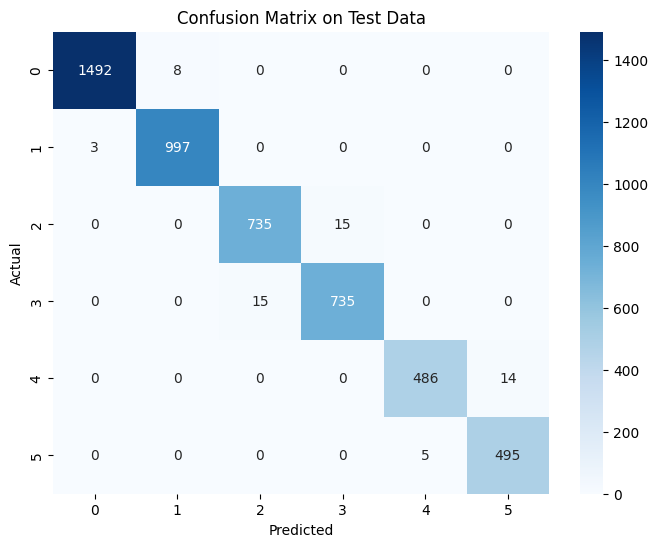

In [65]:
# Load the test dataset
df_test = pd.read_csv("student_data_test.csv")

# Apply label encoding to categorical variables
for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = label_encoders[column].transform(df_test[column])

# Split the test dataset into features and target variable
X_test = df_test.drop('Performance', axis=1)
y_test = df_test['Performance']

# Make predictions on the test dataset
y_pred_test = clf.predict(X_test)

# Evaluate the model
print("Accuracy on Test Data:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision on Test Data:", metrics.precision_score(y_test, y_pred_test, average='weighted'))
print("Recall on Test Data:", metrics.recall_score(y_test, y_pred_test, average='weighted'))
print("F1-Score on Test Data:", metrics.f1_score(y_test, y_pred_test, average='weighted'))
print(metrics.classification_report(y_test, y_pred_test))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.savefig('confusion_matrix_test.jpg', dpi=300)
plt.show()
